In [1]:
#Has to be run twice most of the time (restart runtime inbetween)
!apt-get -qq install -y libspatialindex-dev
!pip install osmnx
!pip install geopandas

'apt-get' is not recognized as an internal or external command,
operable program or batch file.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
from scipy.spatial import Voronoi, voronoi_plot_2d
import numpy as np
import folium
import requests
from folium.plugins import MarkerCluster
from xml.etree import ElementTree
import folium.vector_layers
from sklearn.cluster import KMeans



#ox.config(use_cache=True, log_console=True)

In [56]:
place_name = "Munich, Bavaria, Germany"
gdf = ox.geometries_from_place(place_name, {'building': True})

In [57]:
#save the centroid of every polygon in longitude and latitude

###############################  OLD CODE ###########################
# gdf["latitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][0], axis=1)
# gdf["longitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][1], axis=1)


gdf["longitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][0], axis=1)
gdf["latitude"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][1], axis=1)

gdf["name"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][0], axis=1)

gdf["barrier"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][1], axis=1)

gdf["entrance"] = gdf.apply(lambda row: list(row.geometry.centroid.coords)[0][1], axis=1)

# gdf["newPoint"] = gdf.applymap(lambda row: row.geometry.centroid)
gdf

entrance  \
element_type osmid                  
node         291364555  48.142918   
             332790689  48.140693   
             347635732  48.134296   
             503678022  48.187823   
             676956290  48.202870   
...                           ...   
relation     16240936   48.118748   
             16328001   48.139554   
             16328047   48.127858   
             16332492   48.195649   
             16446284   48.210601   

                                                                 geometry  \
element_type osmid                                                          
node         291364555                          POINT (11.58825 48.14292)   
             332790689                          POINT (11.57091 48.14069)   
             347635732                          POINT (11.51414 48.13430)   
             503678022                          POINT (11.62765 48.18782)   
             676956290                          POINT (11.54537 48.20287)   
...                                                                   ...   
relation     16240936   POLYGON ((11.55059 48.11878, 11.55066 48.11870...   
             16328001   POLYGON ((11.57244 48.13929, 11.57271 48.13962...   
             16328047   POLYGON ((11.59305 48.12764, 11.59300 48.12755...   
             16332492   POLYGON ((11.60959 48.19571, 11.60954 48.19562...   
             16446284   POLYGON ((11.47508 48.21066, 11.47509 48.21066...   

                       addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                             
node         291364555   München           DE               24         80538   
             332790689   München           DE               10         80333   
             347635732       NaN          NaN              NaN           NaN   
             503678022       NaN          NaN              NaN           NaN   
             676956290       NaN          NaN              NaN           NaN   
...                          ...          ...              ...           ...   
relation     16240936        NaN          NaN              NaN           NaN   
             16328001        NaN          NaN              NaN           NaN   
             16328047        NaN          NaN              NaN           NaN   
             16332492        NaN          NaN              NaN           NaN   
             16446284        NaN          NaN              NaN           NaN   

                                addr:street aeroway access         note  ...  \
element_type osmid                                                       ...   
node         291364555  Prinzregentenstraße     NaN    NaN          NaN  ...   
             332790689        Pacellistraße     NaN    NaN          NaN  ...   
             347635732                  NaN     NaN    NaN          NaN  ...   
             503678022                  NaN     NaN    NaN          NaN  ...   
             676956290                  NaN     NaN    NaN          NaN  ...   
...                                     ...     ...    ...          ...  ...   
relation     16240936                   NaN     NaN    NaN          NaN  ...   
             16328001                   NaN     NaN    NaN          NaN  ...   
             16328047                   NaN     NaN    NaN  Wohnungsamt  ...   
             16332492                   NaN     NaN    NaN          NaN  ...   
             16446284                   NaN     NaN    NaN          NaN  ...   

                        health_facility:type  \
element_type osmid                             
node         291364555                   NaN   
             332790689                   NaN   
             347635732                   NaN   
             503678022                   NaN   
             676956290                   NaN   
...                                      ...   
relation     16240936                    NaN   
             16328001      

In [58]:
import statistics
f=statistics.mean(gdf["latitude"])
h = statistics.mean(gdf["longitude"])
print(f)
print(h)


print(gdf.columns)
print(gdf["name"])



48.142979523988295
11.547820256358756
Index(['entrance', 'geometry', 'addr:city', 'addr:country', 'addr:housenumber',
       'addr:postcode', 'addr:street', 'aeroway', 'access', 'note',
       ...
       'health_facility:type', 'health_specialty:occupational_therapy',
       'health_specialty:physiotherapy', 'health_specialty:speech_therapy',
       'medical_system:western', 'treat:inpatient', 'building:parts',
       'building:roof:shape', 'longitude', 'latitude'],
      dtype='object', length=711)
element_type  osmid    
node          291364555    11.588251
              332790689    11.570915
              347635732    11.514143
              503678022    11.627653
              676956290    11.545368
                             ...    
relation      16240936     11.550094
              16328001     11.572945
              16328047     11.592530
              16332492     11.609961
              16446284     11.475036
Name: name, Length: 180082, dtype: float64


In [60]:
data = pd.DataFrame({
    'lat': gdf["latitude"].values,
    'lon': gdf["longitude"].values
    
#     'name' : gdf["name"].values

 },
#     dtype=str
)

print(len(data))
locations = data[['lat', 'lon']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[3]



# # Save the DataFrame to a CSV file
data.to_csv('output_file_munich.csv',sep=';', index=False)



180082


In [61]:
#############  FINAL CODE 2 WITH SENSOR CLUSTERS WITH DIFFERENT COLORS UNDER EACH GATEWAY ##############


import pandas as pd
import folium
from sklearn.cluster import KMeans

# Load the CSV file with gateway coordinates
gateway_df = pd.read_csv('gateways0.csv', delimiter=";")

# Load the sensor data (replace this with your actual sensor data)
sensor_data = pd.read_csv('output_file_munich.csv', delimiter=";") # Make sure the CSV file contains 'latitude' and 'longitude' columns

# Limit the number of sensors and gateways
max_sensors = 100
max_gateways = min(max_sensors, len(sensor_data))

# Limit the sensor data to the first 'max_sensors' rows
sensor_data = sensor_data.head(max_sensors)

# Limit the gateway data to the first 'max_gateways' rows
gateway_df = gateway_df.head(max_gateways)

# Create a DataFrame with sensor coordinates
data = pd.DataFrame({
    'lon': sensor_data["lon"].values,
    'lat': sensor_data["lat"].values,
}, dtype=float)  # Convert to float

locations = data[['lat', 'lon']]
locationlist = locations.values.tolist()

# Specify the number of clusters (gateways) based on the CSV file
n_clusters = len(gateway_df)

# Perform K-means clustering to find the cluster centers (gateway locations)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(locationlist)
gateway_coords = kmeans.cluster_centers_

# Create a folium map centered on the first gateway location
map_center = gateway_coords[0]
m = folium.Map(location=map_center, tiles='OpenStreetMap', zoom_start=10)

# Initialize a dictionary to store sensor clusters under each gateway
gateway_clusters = {i: [] for i in range(n_clusters)}

# Assign sensors to their respective gateway clusters
labels = kmeans.labels_
for sensor_idx, cluster_idx in enumerate(labels):
    gateway_clusters[cluster_idx].append(sensor_idx)

# Add the sensor markers to the map with cluster colors
cluster_colors = ['darkpurple', 'pink', 'beige', 'darkblue', 'darkgreen', 'darkred', 'red', 'gray', 'cadetblue', 'orange', 'lightblue', 'blue', 'lightred', 'lightgray', 'lightgreen', 'black', 'green', 'white', 'purple']  # Extended list
for cluster_idx, sensor_indices in gateway_clusters.items():
    for sensor_idx in sensor_indices:
        # Use sensor_data DataFrame here instead of gdf
        sensor = sensor_data.iloc[sensor_idx]
        folium.Marker(location=[sensor['lat'], sensor['lon']], icon=folium.Icon(color=cluster_colors[cluster_idx])).add_to(m)

# Add the gateway markers to the map with sensor counts
for i, coord in enumerate(gateway_coords):
    sensor_count = len(gateway_clusters[i])
    folium.Marker(location=[coord[0], coord[1]], icon=folium.Icon(color='red'), popup=f'Sensors: {sensor_count}').add_to(m)

# Display the map
m.save('mapnew44.html')

# Display the latitude and longitude coordinates in a table
print("Sensor Coordinates:")
print(sensor_data[['lat', 'lon']])

# # Save sensor coordinates to a CSV file
# sensor_data[['lat', 'lon']].to_csv('sensor_coordinates2.csv', index=False)


C:\Python\Python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sensor Coordinates:
          lat        lon
0   48.142918  11.588251
1   48.140693  11.570915
2   48.134296  11.514143
3   48.187823  11.627653
4   48.202870  11.545368
..        ...        ...
95  48.177328  11.532659
96  48.177315  11.533584
97  48.177304  11.534510
98  48.176905  11.534506
99  48.127420  11.522810

[100 rows x 2 columns]


In [64]:
# #################   FINAL  #################################################################

# ############  Calculate signal strength for each sensor (based on correct FSPL formula) ##################
import pandas as pd
import math

# Load the CSV file with gateway coordinates
gateway_df = pd.read_csv('gateways0.csv', delimiter=";")  # Make sure the CSV file contains 'latitude' and 'longitude' columns

# Load the sensor data (replace this with your actual sensor data)
sensor_data = pd.read_csv('output_file_munich.csv', delimiter=";")

# Limit the sensor data to the first 100 rows
sensor_data = sensor_data.head(100)

# Specify the number of clusters (gateways) based on the CSV file
n_clusters = len(gateway_df)

# Perform K-means clustering to find the cluster centers (gateway locations)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sensor_data[['lat', 'lon']])

# Get the coordinates of the cluster centers (gateway locations)
gateway_coords = kmeans.cluster_centers_

print(gateway_coords)

# Calculate distance for each sensor from the first gateway
sensor_data['distance_meters'] = sensor_data.apply(
    lambda row: math.sqrt((row['lon'] - gateway_coords[0][1])**2 + (row['lat'] - gateway_coords[0][0])**2),
    axis=1
)

# Constants for signal strength calculation
frequency = 915e6  # Frequency in Hz
transmitter_power_dbm = 20  # Transmitter power in dBm
transmitter_antenna_gain_dbi = 2  # Transmitter antenna gain in dBi
receiver_antenna_gain_dbi = 4  # Receiver antenna gain in dBi

# Calculate signal strength for each sensor based on path loss
sensor_data['signal_strength_dbm'] = sensor_data.apply(
    lambda row: transmitter_power_dbm + transmitter_antenna_gain_dbi + receiver_antenna_gain_dbi - (20 * math.log10(frequency) + 20 * math.log10(row['distance_meters']) + 32.45),
    axis=1
)

print(sensor_data[['lat', 'lon', 'distance_meters', 'signal_strength_dbm']])




[[48.11004299 11.46707526]
 [48.19265255 11.56864282]
 [48.13750054 11.56557682]
 [48.1539676  11.42174695]
 [48.11878638 11.61927802]
 [48.1391064  11.50199906]
 [48.08732679 11.52545022]
 [48.1348099  11.7153416 ]
 [48.17585053 11.6264046 ]
 [48.18807044 11.48257512]
 [48.1736947  11.53121838]]
          lat        lon  distance_meters  signal_strength_dbm
0   48.142918  11.588251         0.125556          -167.655191
1   48.140693  11.570915         0.108269          -166.368466
2   48.134296  11.514143         0.052949          -160.155568
3   48.187823  11.627653         0.178423          -170.707463
4   48.202870  11.545368         0.121435          -167.365329
..        ...        ...              ...                  ...
95  48.177328  11.532659         0.093960          -165.137252
96  48.177315  11.533584         0.094599          -165.196113
97  48.177304  11.534510         0.095245          -165.255230
98  48.176905  11.534506         0.094960          -165.229237
99  48.12

C:\Python\Python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [65]:
import folium

# Create a map centered around the first gateway
map_center = [gateway_coords[0][0], gateway_coords[0][1]]
mymap = folium.Map(location=map_center, zoom_start=12)

# Add markers for each sensor with popup information
for index, row in sensor_data.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Signal Strength: {row['signal_strength_dbm']:.2f} dBm",
        icon=folium.Icon(color='blue')
    ).add_to(mymap)

# Add markers for gateway locations
for index, row in gateway_df.iterrows():
    folium.Marker(
        location=[row['longitude'], row['latitude']],
        popup=f"Gateway {index + 1}",
        icon=folium.Icon(color='red', icon='cloud')
    ).add_to(mymap)

# Save the map to an HTML file
mymap.save('sensor_map.html')


In [66]:
# #################   FINAL (assigning SF to each sensor) ####################################################################

# Sort the sensor data in ascending order of signal strength
sorted_sensor_data = sensor_data.sort_values(by='signal_strength_dbm')

# Determine the number of sensors
num_sensors = len(sorted_sensor_data)

# Assign spreading factors (SF) based on signal strength thresholds
sf_values = [7, 8, 9, 10, 11, 12]  # SF values in increasing order

# Signal strength thresholds for SF assignment (you can adjust these thresholds)
thresholds = [-120.5 , -130.5, -140.5 , -150.5 , -160.50]

sf_assignment = []

# sf_idx = 0
for _, sensor in sorted_sensor_data.iterrows():
    sf_idx = 0
    while sf_idx < len(thresholds) and sensor['signal_strength_dbm'] < thresholds[sf_idx]:
        sf_idx += 1
    sf_assignment.append(sf_values[sf_idx])

# Add the spreading factor assignment to the sorted sensor data
sorted_sensor_data['spreading_factor'] = sf_assignment

# Print the sorted sensor data with assigned spreading factors
print(sorted_sensor_data[['lat', 'lon', 'signal_strength_dbm', 'spreading_factor']])

# Sort the sensor data and assign spreading factors as mentioned in the previous response

# Define the path to save the CSV file
output_csv_file = 'sensor_data_with_spreading_factors.csv'

# Save the sorted sensor data with assigned spreading factors to a CSV file
sorted_sensor_data.to_csv(output_csv_file, index=False)

print(f"Sensor data with assigned spreading factors saved to {output_csv_file}")



          lat        lon  signal_strength_dbm  spreading_factor
60  48.134810  11.715342          -173.619786                12
75  48.117650  11.654257          -171.130869                12
3   48.187823  11.627653          -170.707463                12
5   48.175929  11.627791          -170.474233                12
33  48.106990  11.640342          -170.454054                12
..        ...        ...                  ...               ...
43  48.109653  11.466543          -122.066678                 8
44  48.109684  11.466537          -121.897815                 8
45  48.109715  11.466531          -121.747020                 8
46  48.109751  11.466523          -121.585632                 8
47  48.109786  11.466517          -121.456713                 8

[100 rows x 4 columns]
Sensor data with assigned spreading factors saved to sensor_data_with_spreading_factors.csv


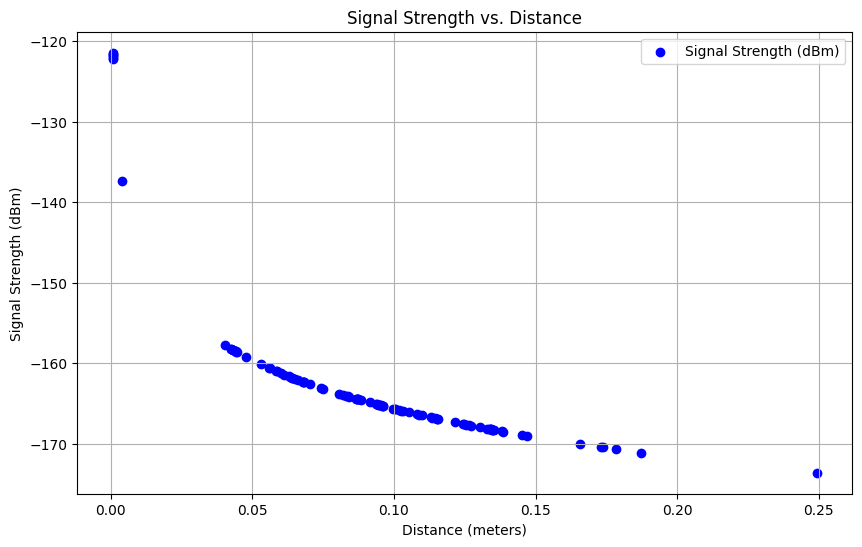

In [67]:
############ PLOT OF SIGNAL STRENGTH WRT DISTANCE  ###################################################

import matplotlib.pyplot as plt

# Assuming you have already calculated signal_strength_dbm and distance_meters

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sensor_data['distance_meters'], sensor_data['signal_strength_dbm'], c='b', marker='o', label='Signal Strength (dBm)')
plt.xlabel('Distance (meters)')
plt.ylabel('Signal Strength (dBm)')
plt.title('Signal Strength vs. Distance')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [12]:
# # ############  Calculate signal strength for each sensor (RUN) ##################
# import pandas as pd
# import math

# # Load the CSV file with gateway coordinates
# gateway_df = pd.read_csv('gateways0.csv', delimiter=";")  # Make sure the CSV file contains 'latitude' and 'longitude' columns

# # Load the sensor data (replace this with your actual sensor data)
# sensor_data = pd.read_csv('sensors0.csv',delimiter=";")

# # Limit the sensor data to the first 100 rows
# sensor_data = sensor_data.head(100)

# # Specify the number of clusters (gateways) based on the CSV file
# n_clusters = len(gateway_df)

# # Perform K-means clustering to find the cluster centers (gateway locations)
# kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sensor_data[['lat', 'lon']])

# # Get the coordinates of the cluster centers (gateway locations)
# gateway_coords = kmeans.cluster_centers_

# # Constants for signal strength calculation
# frequency = 915e6  # Frequency in Hz
# speed_of_light = 299792458  # Speed of light in m/s
# transmitter_power_dbm = 20  # Transmitter power in dBm
# transmitter_antenna_gain_dbi = 2  # Transmitter antenna gain in dBi
# receiver_antenna_gain_dbi = 4  # Receiver antenna gain in dBi

# # Calculate free-space path loss
# free_space_path_loss_db = 20 * math.log10(4 * math.pi * frequency / speed_of_light)

# # Calculate distance for each sensor from the first gateway
# sensor_data['distance_meters'] = sensor_data.apply(
#     lambda row: math.sqrt((row['lon'] - gateway_coords[0][1])**2 + (row['lat'] - gateway_coords[0][0])**2),
#     axis=1
# )

# # Calculate signal strength for each sensor
# sensor_data['signal_strength_dbm'] = sensor_data.apply(
#     lambda row: transmitter_power_dbm + transmitter_antenna_gain_dbi + receiver_antenna_gain_dbi - free_space_path_loss_db - 20 * math.log10(row['distance_meters']),
#     axis=1
# )

# print(sensor_data['signal_strength_dbm'])

In [68]:
# Sort the sensor data in ascending order of signal strength (RUN)

sorted_sensor_data = sensor_data.sort_values(by='signal_strength_dbm')

# Determine the number of sensors
num_sensors = len(sorted_sensor_data)

# Assign spreading factors (SF) from 7 to 12 based on the signal strength
sf_values = [7, 8, 9, 10, 11, 12]
sf_per_sensor = num_sensors // len(sf_values)
sf_assignment = []

for i, sensor in enumerate(sorted_sensor_data.iterrows()):
    sf_idx = i // sf_per_sensor
    sf = sf_values[min(sf_idx, len(sf_values) - 1)]  # Ensure SF doesn't exceed the available values
    sf_assignment.append(sf)

# Add the spreading factor assignment to the sorted sensor data
sorted_sensor_data['spreading_factor'] = sf_assignment

# Print the sorted sensor data with assigned spreading factors
print(sorted_sensor_data[['lat', 'lon', 'signal_strength_dbm', 'spreading_factor']])


          lat        lon  signal_strength_dbm  spreading_factor
60  48.134810  11.715342          -173.619786                 7
75  48.117650  11.654257          -171.130869                 7
3   48.187823  11.627653          -170.707463                 7
5   48.175929  11.627791          -170.474233                 7
33  48.106990  11.640342          -170.454054                 7
..        ...        ...                  ...               ...
43  48.109653  11.466543          -122.066678                12
44  48.109684  11.466537          -121.897815                12
45  48.109715  11.466531          -121.747020                12
46  48.109751  11.466523          -121.585632                12
47  48.109786  11.466517          -121.456713                12

[100 rows x 4 columns]


In [69]:
#######################  sets SF and displays updated cluster #####################################


import pandas as pd
import folium
from sklearn.cluster import KMeans
import random
import math

# Load the CSV file with gateway coordinates
gateway_df = pd.read_csv('gateways0.csv', delimiter=";")  # Make sure the CSV file contains 'latitude' and 'longitude' columns

# Load the sensor data (replace this with your actual sensor data)
sensor_data = pd.read_csv('output_file_munich.csv', delimiter=";")

# Limit the sensor data to the first 100 rows
sensor_data = sensor_data.head(100)

######################################################################
# Create a DataFrame with sensor coordinates
data = pd.DataFrame({
    'lon': gdf["longitude"].values,
    'lat': gdf["latitude"].values,
}, dtype=float)  # Convert to float

locations = data[['lat', 'lon']]
locationlist = locations.values.tolist()
###############################################################

# Specify the number of clusters (gateways) based on the CSV file
n_clusters = len(gateway_df)

# Perform K-means clustering to find the cluster centers (gateway locations)
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(sensor_data[['lat', 'lon']])

# Get the coordinates of the cluster centers (gateway locations)
gateway_coords = kmeans.cluster_centers_

# Constants for signal strength calculation
frequency = 915e6  # Frequency in Hz
speed_of_light = 299792458  # Speed of light in m/s
transmitter_power_dbm = 20  # Transmitter power in dBm
transmitter_antenna_gain_dbi = 2  # Transmitter antenna gain in dBi
receiver_antenna_gain_dbi = 4  # Receiver antenna gain in dBi

# Calculate free-space path loss
free_space_path_loss_db = 20 * math.log10(4 * math.pi * frequency / speed_of_light)

# Calculate distance for each sensor from the first gateway
sensor_data['distance_meters'] = sensor_data.apply(
    lambda row: math.sqrt((row['lat'] - gateway_coords[0][1])**2 + (row['lon'] - gateway_coords[0][0])**2),
    axis=1
)

# User input for setting the Spreading Factor (SF)
sf_input = int(input("Enter Spreading Factor (SF) from 7 to 12: "))
if sf_input < 7 or sf_input > 12:
    print("Invalid SF. SF should be between 7 and 12.")
    exit()

# Calculate signal strength for each sensor based on the user-input SF
sensor_data['signal_strength_dbm'] = sensor_data.apply(
    lambda row: transmitter_power_dbm + transmitter_antenna_gain_dbi + receiver_antenna_gain_dbi - free_space_path_loss_db - 20 * math.log10(row['distance_meters']) - 10 * (sf_input - 7),
    axis=1
)

# Create a folium map centered on the first gateway location
map_center = gateway_coords[0]
m = folium.Map(location=map_center[::1], tiles='OpenStreetMap', zoom_start=10)

# Initialize a dictionary to store sensor clusters under each gateway
gateway_clusters = {i: [] for i in range(n_clusters)}

# Assign sensors to their respective gateway clusters
labels = kmeans.labels_
for sensor_idx, cluster_idx in enumerate(labels):
    gateway_clusters[cluster_idx].append(sensor_idx)

# Generate a list of distinct random colors for clusters
cluster_colors = ['darkpurple', 'pink', 'beige', 'darkblue', 'darkgreen', 'darkred', 'gray', 'cadetblue', 'orange', 'lightblue', 'blue', 'lightred', 'lightgray', 'lightgreen', 'black', 'green', 'white', 'purple']

# Add the sensor markers to the map with unique cluster colors
sensor_markers = []  # To store sensor markers
for cluster_idx, sensor_indices in gateway_clusters.items():
    cluster_color = cluster_colors[cluster_idx]  # Get a unique color for the cluster
    for sensor_idx in sensor_indices:
        # Use sensor_data DataFrame here instead of gdf
        sensor = sensor_data.iloc[sensor_idx]
        sensor_marker = folium.Marker(location=[sensor['lat'], sensor['lon']], icon=folium.Icon(color=cluster_color), popup=f'SF: {sf_input}')
        sensor_markers.append(sensor_marker)

# Add the gateway markers to the map with sensor counts
for i, coord in enumerate(gateway_coords):
    sensor_count = len(gateway_clusters[i])
    gateway_marker = folium.Marker(location=[coord[0], coord[1]], icon=folium.Icon(color='red'), popup=f'Sensors: {sensor_count}')
    sensor_markers.append(gateway_marker)

# Create a feature group for sensor markers to add to the map
sensor_fg = folium.FeatureGroup(name='Sensor Markers')
for sensor_marker in sensor_markers:
    sensor_marker.add_to(sensor_fg)
sensor_fg.add_to(m)

# Display the map
folium.LayerControl().add_to(m)  # Add layer control for enabling/disabling sensor markers
m.save('map_with_user_input_sf.html')


C:\Python\Python3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Enter Spreading Factor (SF) from 7 to 12: 11


In [70]:
m

In [71]:
map_center[::1]

array([48.11004299, 11.46707526])